In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('../2017-1.xls')

df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [6]:
nCluster = 3

cluster countries into distinct groups based on their economic and social factors

In [7]:
socEconCol = ['Economy..GDP.per.Capita.', 'Family', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

In [8]:
socEconX = StandardScaler().fit_transform(df[socEconCol])

In [9]:
kMeansSocEcon = KMeans(n_clusters=nCluster, random_state=0)
kMeansSocEcon.fit(socEconX)

KMeans(n_clusters=3, random_state=0)

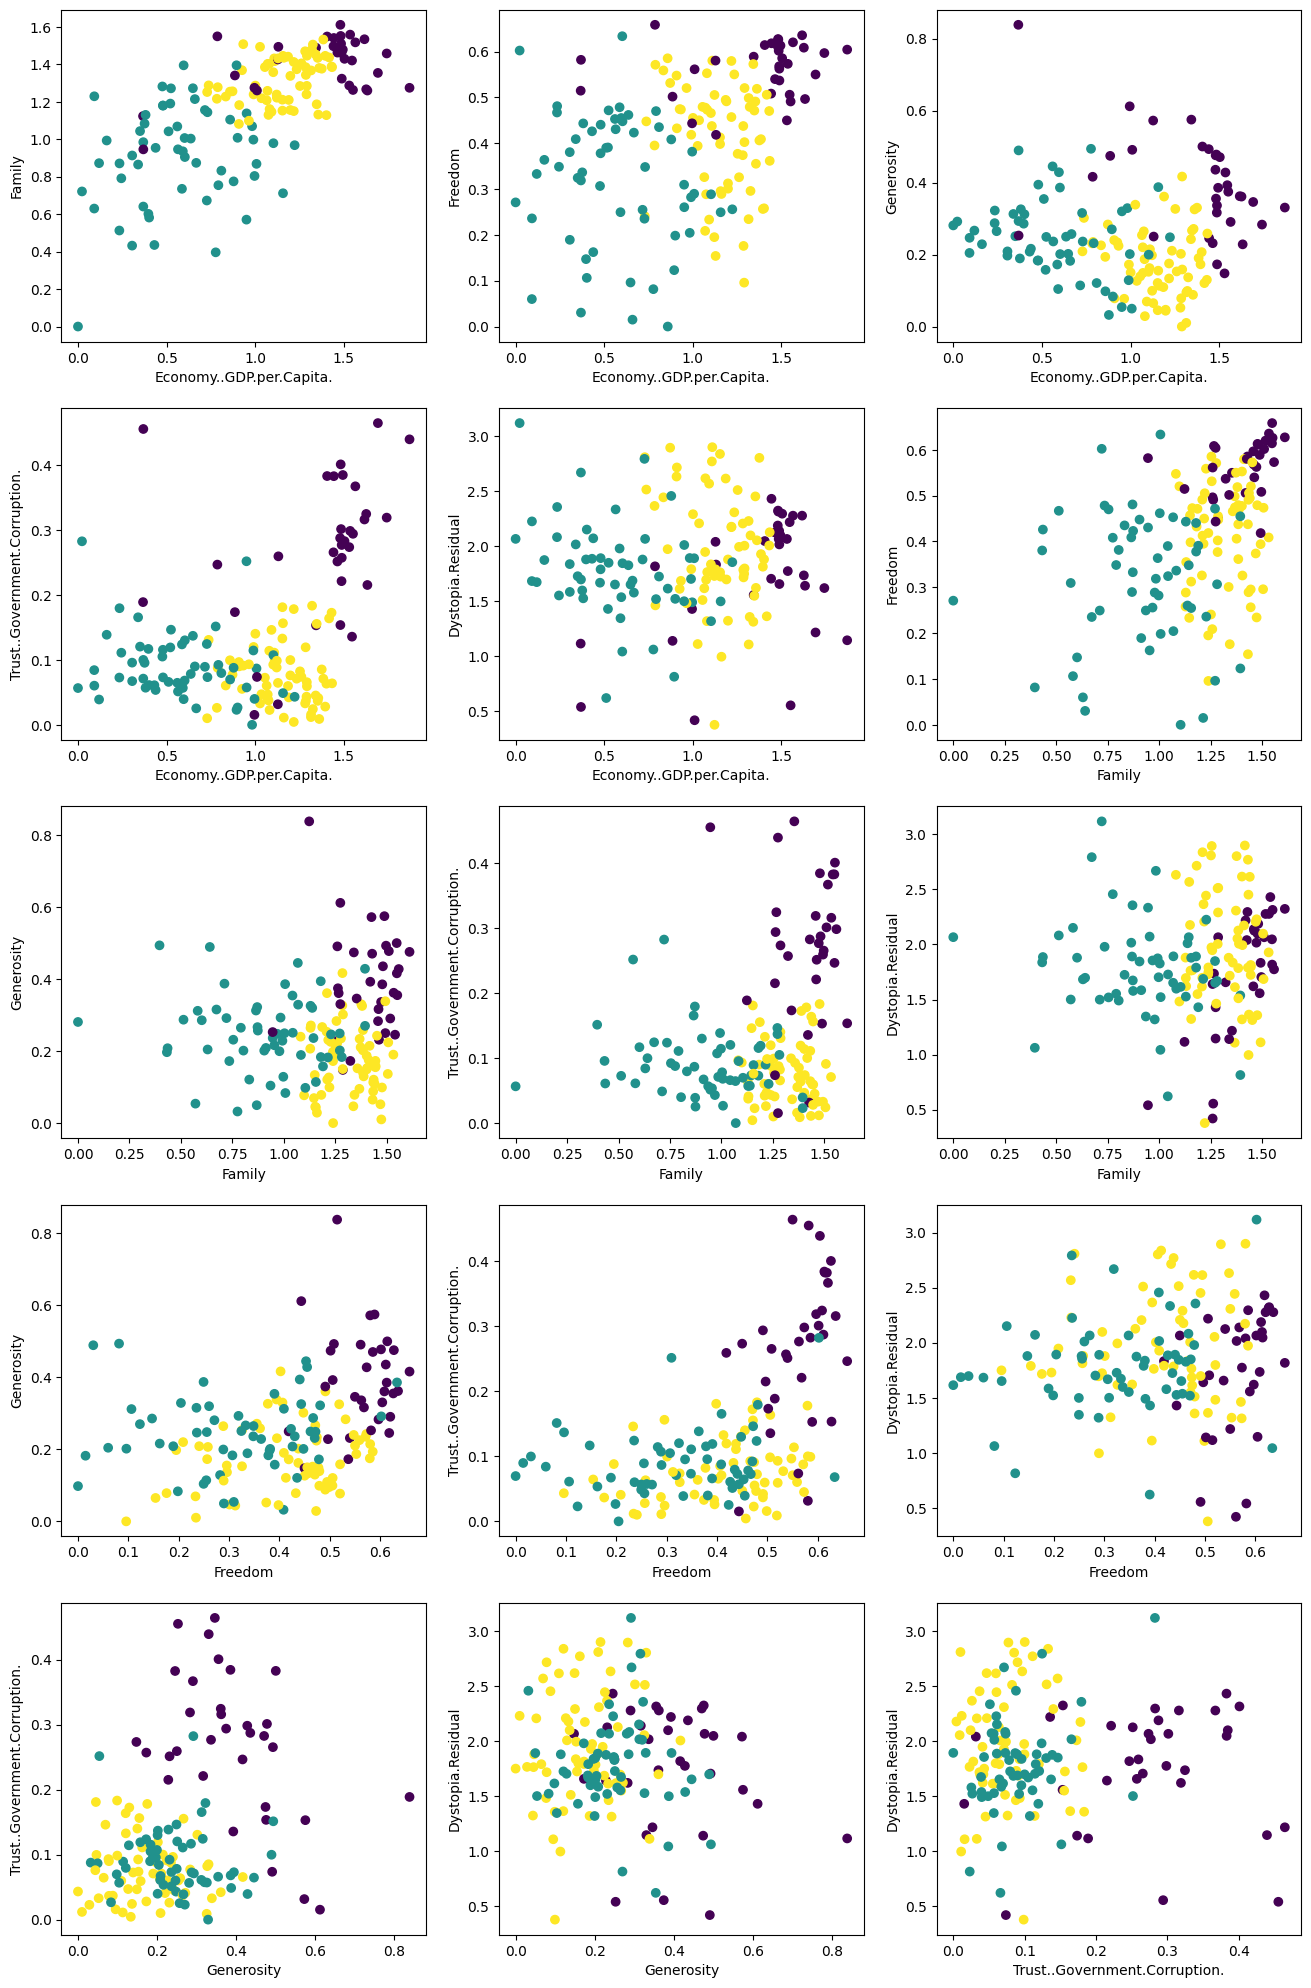

In [16]:
def plotCluster(data, nCluster, kMeans):
    nrRows = 5
    figLength = nrRows*5

    plt.figure(figsize=(16, figLength))

    for i, (x, y) in enumerate(itertools.combinations(data.columns, 2)):
        plt.subplot(nrRows,3,i+1)
        plt.scatter(data[x],data[y] , c=kMeans.labels_, cmap='viridis')
        plt.xlabel(x)
        plt.ylabel(y)

    plt.show()

plotCluster(df[socEconCol], nCluster, kMeansSocEcon)

generosity, life expectancy, and GDP per capita

In [21]:
glegdpCol = ['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Generosity']

In [22]:
glegdpX = StandardScaler().fit_transform(df[glegdpCol])

In [23]:
glegdpKMean= KMeans(n_clusters=nCluster, random_state=0)
glegdpKMean.fit(glegdpX)

KMeans(n_clusters=3, random_state=0)

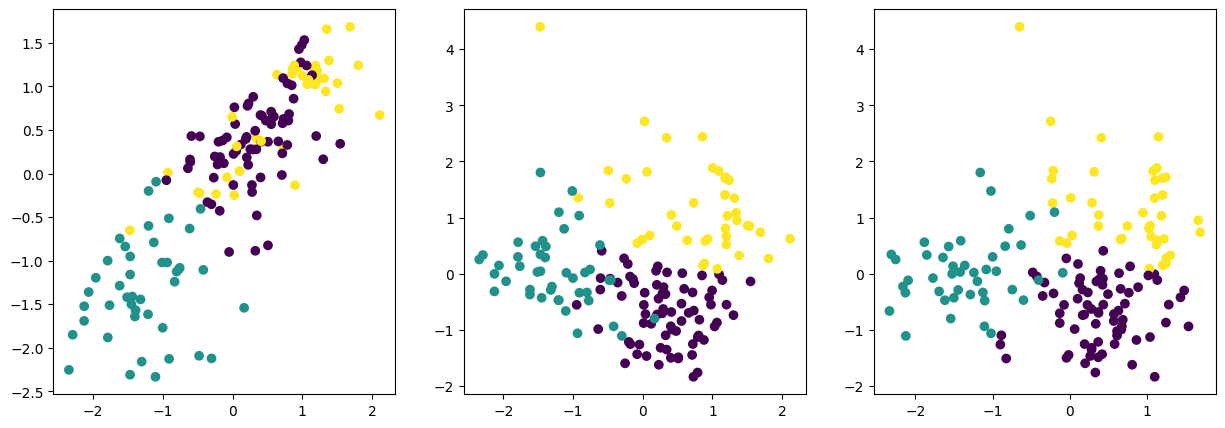

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.scatter(glegdpX[:, 0], glegdpX[:, 1], c=glegdpKMean.labels_, cmap='viridis')
plt.subplot(1,3,2)
plt.scatter(glegdpX[:, 0], glegdpX[:, 2], c=glegdpKMean.labels_, cmap='viridis')
plt.subplot(1,3,3)
plt.scatter(glegdpX[:, 1], glegdpX[:, 2], c=glegdpKMean.labels_, cmap='viridis')
plt.show()

economic freedom and trust in government

In [25]:
freeTrustCol = ['Freedom', 'Trust..Government.Corruption.']

In [26]:
freeTrustX = StandardScaler().fit_transform(df[glegdpCol])

In [27]:
freeTrustKMean = KMeans(n_clusters=nCluster, random_state=0)
freeTrustKMean.fit(freeTrustX)

KMeans(n_clusters=3, random_state=0)

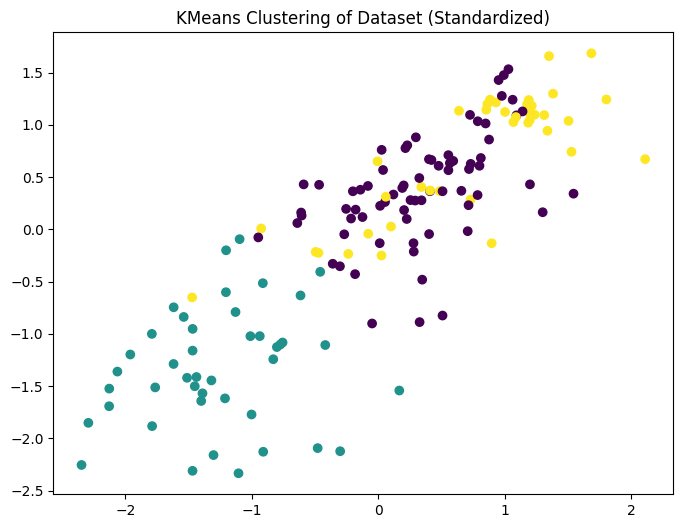

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(freeTrustX[:, 0], freeTrustX[:, 1], c=freeTrustKMean.labels_, cmap='viridis')
plt.title('KMeans Clustering of Dataset (Standardized)')
plt.show()